In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
max_date = session.query(func.max(measurement.date)).all()
max_date[0][0]

'2017-08-23'

In [10]:
# date_object = dt.datetime.strptime(max_date[0][0], "%Y-%m-%d")
# date_object

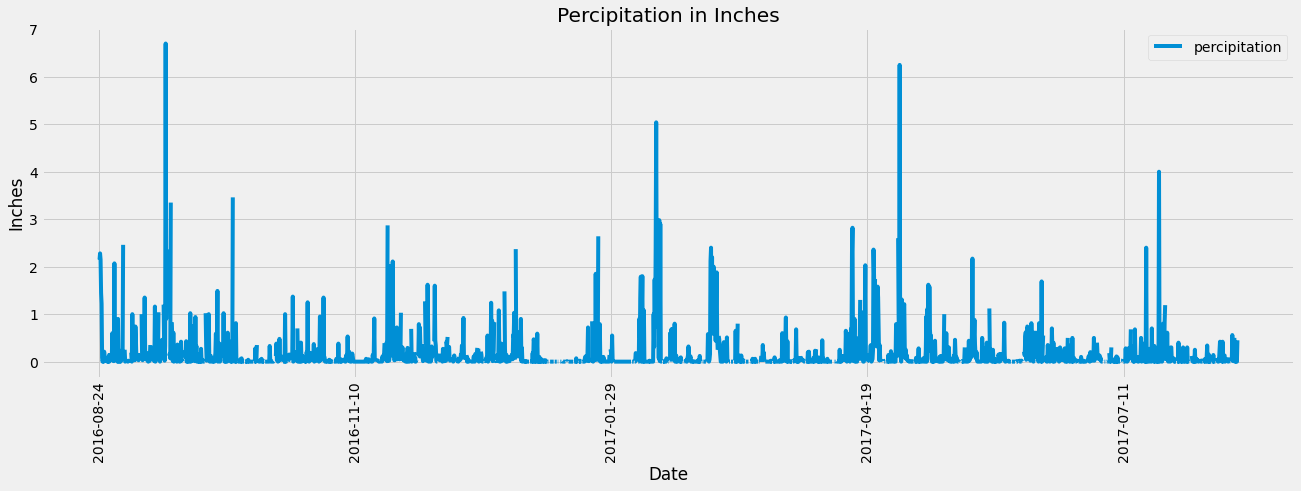

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_back = dt.datetime.strptime(max_date[0][0], "%Y-%m-%d") - dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_back).all()
# prcp_score
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_score, columns = ["date", "percipitation"])
prcp_df = prcp_df.set_index("date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_index()
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize = (20,6))
plt.title("Percipitation in Inches")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation = 90)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(station.station)).all()
station_count[0][0]

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_freq = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_freq[0][0]

# model.Resource.resource_group_id, func.max(model.Resource.last_modified)
# ).group_by(model.Resource.resource_group_id).order_by(
#     func.max(model.Resource.last_modified).desc())

'USC00519281'

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act_station_summ = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == station_freq[0][0]).all()
most_act_station_summ

[(54.0, 85.0, 71.66378066378067)]

Text(32.35, 0.5, 'Frequency')

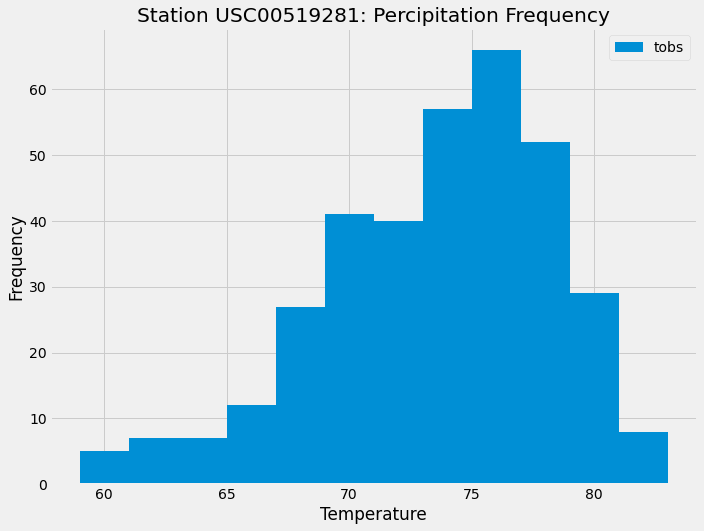

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_act_station_12_month = session.query(measurement.tobs).filter(measurement.station == station_freq[0][0]).filter(measurement.date >= one_year_back).all()
most_act_station_12_month

# Plot histogram
df = pd.DataFrame(most_act_station_12_month, columns=["tobs"])
df.plot.hist(bins=12, figsize = (10,7))
plt.tight_layout()

plt.title("Station USC00519281: Percipitation Frequency")
plt.xlabel("Temperature")
plt.ylabel("Frequency")


# Close session

In [21]:
# Close Session
session.close()